In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 52s 107ms/step - loss: 0.2990 - accuracy: 0.9096 - val_loss: 0.0580 - val_accuracy: 0.9795
Epoch 2/10
469/469 [==============================] - 49s 104ms/step - loss: 0.0911 - accuracy: 0.9728 - val_loss: 0.0466 - val_accuracy: 0.9839
Epoch 3/10
469/469 [==============================] - 50s 107ms/step - loss: 0.0668 - accuracy: 0.9804 - val_loss: 0.0318 - val_accuracy: 0.9895
Epoch 4/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0556 - accuracy: 0.9835 - val_loss: 0.0307 - val_accuracy: 0.9897
Epoch 5/10
469/469 [==============================] - 46s 99ms/step - loss: 0.0448 - accuracy: 0.9867 - val_loss: 0.0261 - val_accuracy: 0.9907
Epoch 6/10
469/469 [==============================] - 47s 101ms/step - loss: 0.0383 - accuracy: 0.9880 - val_loss: 0.0268 - val_accuracy: 0.9913
Epoch 7/10
469/469 [==============================] - 47s 101ms/step - loss: 0.0365 - accuracy: 0.9887 - val_loss: 0.0237 - val_accu

In [10]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 3s 10ms/step - loss: 0.0218 - accuracy: 0.9931
Test Loss: 0.0218
Test Accuracy: 0.9931


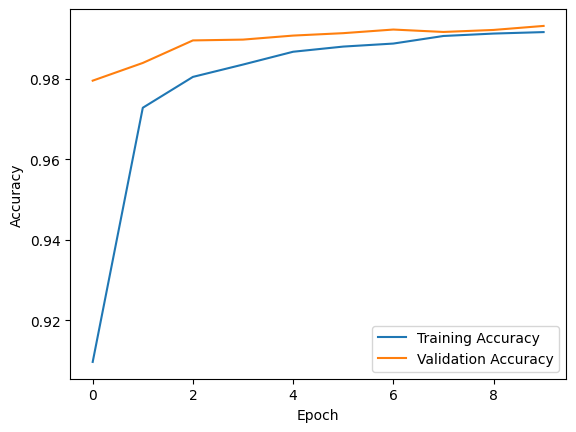

In [11]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
# Make predictions on test data
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 3s 9ms/step


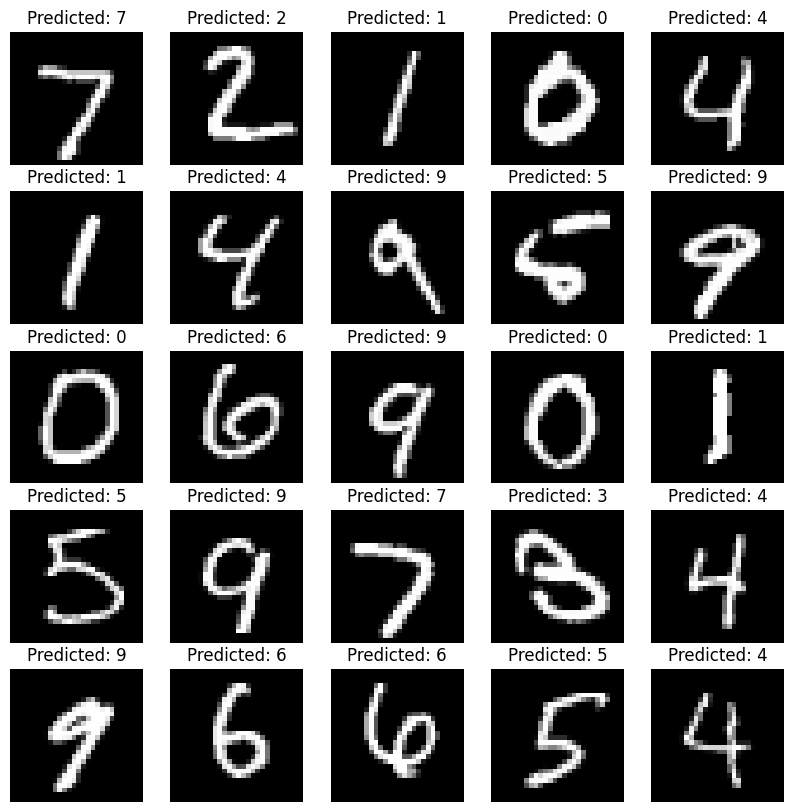

In [13]:
# Display some test images and their predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}')
    plt.axis('off')
plt.show()

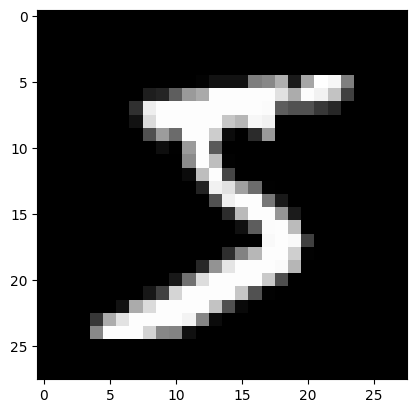

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])

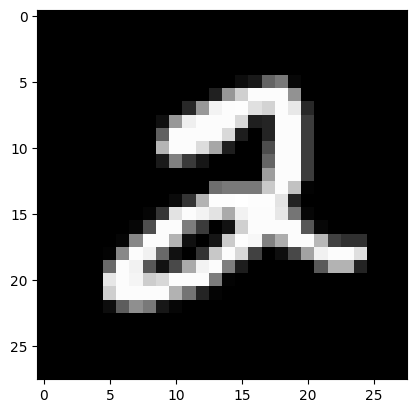

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
plt.imshow(X_train[5], cmap="gray")
plt.show()
print (y_train[5])

In [17]:
!pip install opencv-python

In [18]:
import cv2




----------------Contoured Image--------------------


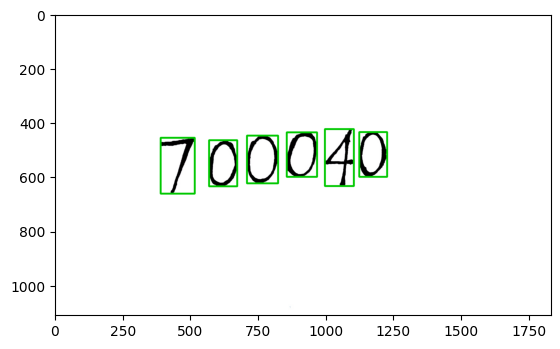

In [19]:
image = cv2.imread('calc.jpeg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)

    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 200, 0), thickness=5)

    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]

    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))

    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)

    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()

inp = np.array(preprocessed_digits)

1/1 [==============================] - 0s 88ms/step


---------------------------------------


=========PREDICTION============ 




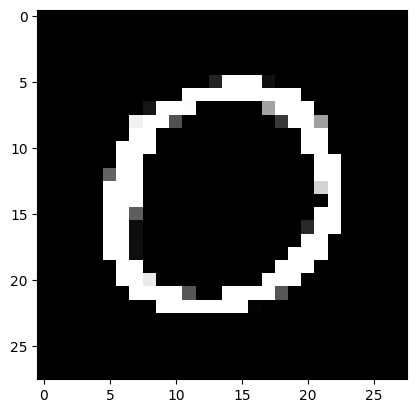



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 28ms/step


---------------------------------------


=========PREDICTION============ 




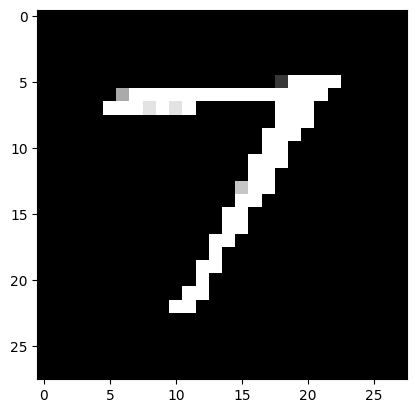



Final Output: 7

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 42ms/step


---------------------------------------


=========PREDICTION============ 




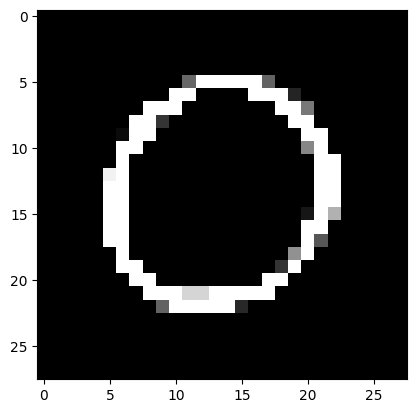



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 44ms/step


---------------------------------------


=========PREDICTION============ 




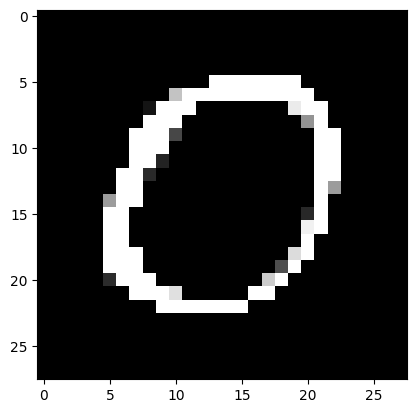



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 54ms/step


---------------------------------------


=========PREDICTION============ 




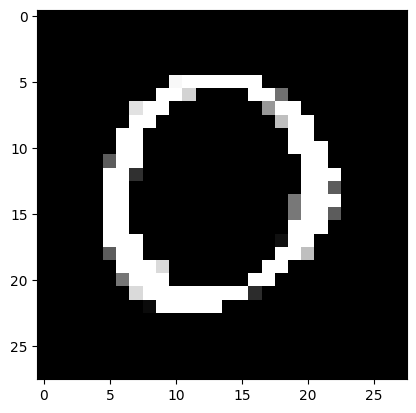



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 48ms/step


---------------------------------------


=========PREDICTION============ 




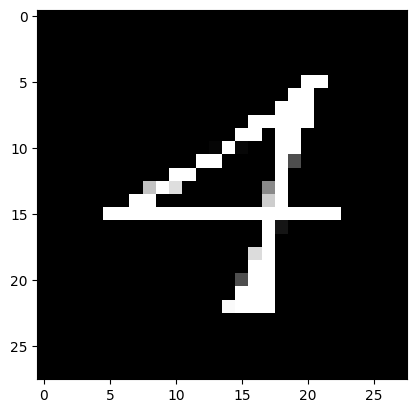



Final Output: 4

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




In [21]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))

    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))

    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))

    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 0
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")

In [22]:
import numpy as np
n=[2,3,4,6,0,7,8]
arr=np.array(n)
arr

array([2, 3, 4, 6, 0, 7, 8])

In [23]:
temp = (arr>5) & (arr<8)

In [24]:
arr[temp]

array([6, 7])

In [25]:
## Checking out the shapes involved in dataset
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000, 10)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000, 10)


In [26]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [27]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000, 10)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000, 10)


In [20]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_accuracy)


Epoch 1/5
938/938 [==============================] - 56s 57ms/step - loss: 0.1881 - accuracy: 0.9425
Epoch 2/5
938/938 [==============================] - 51s 54ms/step - loss: 0.0498 - accuracy: 0.9848
Epoch 3/5
938/938 [==============================] - 51s 54ms/step - loss: 0.0348 - accuracy: 0.9892
Epoch 4/5
938/938 [==============================] - 52s 55ms/step - loss: 0.0282 - accuracy: 0.9909
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.0244 - accuracy: 0.9915
Test accuracy: 0.9915000200271606
